# Optimization via Stochastic Gradient Descent
While working with Machine Learning (ML) you are usually given a dataset $D=\{(x^{(i)},y^{(i)})\}_{i=1}^N$ and a parametric function $f(w;D)=\sum_{i=1}^N \ell(w;x^{(i)},y^{(i)})$ where the vector $w$ is usually referred to as the *weights*
of the model. The *training* procedure can be written as $$ $$
$$w^*=arg \underset{w}{\operatorname{min}} f(w;D)= arg \underset{w}{\operatorname{min}} \sum_{i=1}^N \ell (w;x^{(i)},y^{(i)}) \qquad (3)$$ $$ $$
what is interesting in $(3)$ from the optimization point of view, is that the objective function $f(w;D)$ is written as a sum of independent terms that are related to datapoints (we will see in the next lab why this formulation is so common). $$ $$
Suppose we want to apply GD to $(3)$. Given an initial vector $w_0\in R^n$, the iteration become $$ $$
$$w_{k+1}=w_k-\alpha_k\nabla_wf(w_k;D)=w_k-\alpha_k\sum_{i=1}^N\nabla_w\ell(w_k;x^{(i)},y^{(i)})$$ $$ $$
Thus, to compute the iteration we need the gradient with respect to the weights of the objective functions,
that can be computed by summing up the gradients of the independent functions $\ell(w;x^{(i)},y^{(i)})$. $$ $$
Unfortunately, even if it is easy to compute the gradient for each of the $\ell(w;x^{(i)},y^{(i)})$, when the number of
samples $N$ is large (which is common in Machine Learning), the computation of the full gradient $\nabla_wf(w;D)$ is prohibitive. For this reason, in such optimization problems, instead of using a standard GD algorithm, it is better using the Stochastic Gradient Descent (SGD) method. That is a variant of the classical GD where, instead of computing $\nabla_wf(w;D)=\sum_{i=1}^N\nabla_w\ell(w;x^{(i)},y^{(i)})$, the summation is reduced to a limited number
of terms, called a *batch*. The idea is the following:
- Given a number $N_{batch}$ (usually called **batch_size**), randomly extract a subdataset $\mathcal{M}$ with $|\mathcal{M}|=N_{batch}$ from $D$.$$ $$
- Approximate the true gradient $\nabla_wf(w;D)=\sum_{i=1}^N\nabla_w\ell(w;x^{(i)},y^{(i)})$ with $\nabla_wf(w;\mathcal{M})=\sum_{i\in \mathcal{M}}\nabla_w\ell(w;x^{(i)},y^{(i)})$. $$ $$
- Compute one single iteration of the GD algorithm $$ $$ $$w_{k+1}=w_k-\alpha_k\nabla_wf(w_k;\mathcal{M})$$ $$ $$
- Repeat until you have extracted the full dataset. Notice that the random sampling at each iteration is done without replacement.$$ $$

Each iteration of the algorithm above is usually called *batch iteration*. When the whole dataset has been processed, we say that we completed an *epoch* of the SGD method. This algorithm should be repeated for a fixed number $E$ of epochs to reach convergence. $$ $$
Unfortunately, one of the biggest drawbacks of SGD with respect to GD, is that now we cannot check the convergence anymore (since we can't obviously compute the gradient of $f(w;D)$ to check its distance from zero) and we can't use the backtracking algorithm, for the same reason. As a consequence, the algorithm will stop ONLY after reaching the fixed number of epochs, and we must set a good value for the step size $\alpha_k$ by hand. Those problems are solved by recent algorithms like SGD with Momentum, Adam, AdaGrad, ... $$ $$

- Write a Python script that implement the SGD algorithm, following the structure you already wrote for GD. That script should work as follows: $$ $$ *Input: $$ $$ $\qquad$ f: the function f(w; D) we want to optimize. It is supposed to be a Python function, not an array. $$ $$ $\qquad$ grad_f: the gradient of f(w; D). It is supposed to be a Python function, not an array. $$ $$ $\qquad$ w0: an n-dimensional array which represents the initial iterate. $$ $$ $\qquad$ data: a tuple (x, y) that contains the two arrays x and y, where x is the input data, y is the output data. $$ $$ $\qquad$ batch_size: an integer. The dimension of each batch. Should be a divisor of the number of data. $$ $$ $\qquad$ n_epochs: an integer. The number of epochs you want to reapeat the iterations. $$ $$ Output: $$ $$ $\qquad$ w: an array that contains the value of w_k FOR EACH iterate w_k (not only the latter). $$ $$ $\qquad$ f_val: an array that contains the value of f(w_k; D) FOR EACH iterate w_k ONLY after each epoch. $$ $$ $\qquad$ grads: an array that contains the value of grad_f(w_k; D) FOR EACH iterate w_k ONLY after each epoch. $$ $$ $\qquad$ err: an array the contains the value of ||grad_f(w_k; D)||_2 FOR EACH iterate w_k ONLY after each epoch*. $$ $$
- To test the script above, construct 3 different dataset in the following way: $$ $$
    1. Generate a true solution $w_{true}=(1,1,...,1)^T\in R^n$, for a fixed $n$ of your choice. $$ $$
    2. Generate the input data $x\in R^{n×N}$ randomly (**np.random.rand**). $$ $$
    3. Generate 3 different sets of output data: $$y^{(i)}=w_1x_1^{(i)}+...+w_nx_n^{(i)}\qquad\forall i=1,...,N$$ $$\tilde{y}^{(i)}=w_1x_1^{(i)}+...+w_nx_n^{(i)}+\mathcal{n}_i\qquad\forall i=1,...,N$$ $$z^{(i)}=w_1(x_1^{(i)})^2+...+w_n(x_n^{(i)})^2\qquad\forall i=1,...,N$$ $$ $$ where $\mathcal{n}_i$ is a random value generated by the function **np.random.normal(0, sigma, shape)** where **sigma=0.1**. $$ $$
    4. For each set of data $(x,y),(x,\tilde{y}),(x,z)$, define $f(w;D)=\sum_{i=1}^N(x^{(i)}\centerdot w-y^{(i)})^2)$ and use it as the input for your implementation of the SGD algorithm for different batch sizes, number of epochs and step sizes. $$ $$
    
- Comment the obtained results.

***
### we want to find the weights which minimize the loss
The cycle in the inner part of the algorithm is performed $${\frac{epochs \cdot dataset_{numberofrecords}}{batch_{size}}}$$ times
***

In [39]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# The gradient_descent implementation.
def gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, data):

    x_data, y_data = data
    
    def cond1(x_0, x_actual, grad_f, tolf):
        return (np.linalg.norm(grad_f(x_actual, x_data, y_data), 2) < tolf*( np.linalg.norm(grad_f(x_0, x_data, y_data), 2)))
    def cond2(x_previous, x_actual, tolx):
        return np.linalg.norm(np.linalg.norm(x_actual - x_previous, 2) < tolx)

    # Initialization
    k = 0
    
    x = np.zeros((kmax, np.size(x0)))
    f_val = np.zeros((kmax))
    grads = np.zeros((kmax, np.size(x0)))
    err = np.zeros((kmax))
    
    # Assign the values for the first iteration
    x[k, :] = x0
    f_val[k] = f(x0, x_data,y_data)
    grads[k, :] = grad_f(x0,x_data,y_data)
    err[k] = np.linalg.norm(grads[k, :], 2)
      
    # Handle the condition for the first iteration
    x[-1, :] = np.ones((np.size(x[0,:]), ))
    
    # Start the iterations
    while (((not(cond1(x[0,:], x[k,:], grad_f, tolf))) or (not(cond2(x[k-1,:], x[k,:], tolx)))) and (k < kmax-1)):
        # Update the value of x
        x[k+1, :] = x[k, :] - (alpha*grads[k, :])
         
        # Update the values the the actual iteration
        k = k+1
        f_val[k] = f(x[k, :],x_data,y_data)
        grads[k, :] = grad_f(x[k, :], x_data, y_data)
        err[k] = np.linalg.norm(grads[k, :], 2)
    
    # Truncate the vectors that are (eventually) too long
    f_val = f_val[:k+1]
    grads = grads[:k+1, :]
    err = err[:k+1]
    x = x[:k+1]
    '''
    print("Backtracking: ",backtrack)
    if (not backtrack):
        print("Alpha: ",alpha)
    print("Local minimum found: " + str(x[k]))
    print("Iterations performed: " + str(k))
    print("_________________")
    '''
    
    return x, k, f_val, grads, err


# Implement the SGD method
def SGD(f, grad_f, w0, data, batch_size, n_epochs, alpha):
    # Extract data
    x, y = data
    
    # Initialize
    w_val = np.zeros((n_epochs, np.size(w0)))
    f_val = np.zeros((n_epochs,))
    grads = np.zeros((n_epochs, np.size(w0)))
    err = np.zeros((n_epochs,))
    
    # Assign values for the first iteration
    w_val[0, :] = w0
    f_val[0] = f(w0,x,y)
    grads[0, :] = grad_f(w0,x,y)
    err[0] = np.linalg.norm(grads[0, :], 2)
    
    
    w = w0
    
    # For each epoch
    for epoch in range(1, n_epochs):
        # Copy the data
        x_copy = np.copy(x)
        y_copy = np.copy(y)
        
        # Compute the number of batch iteration for each epoch
        n_iter_per_epoch = int(np.size(y) / batch_size)
        
        # Inner iterations
        for k in range(n_iter_per_epoch):
            # in each of this steps I calculate a new x_k from x_k-1 taking a minibatch of the dataset X of size batch_size
            
            # Random indices that composes our mini-batch (look at np.random.choice)
            indexes = np.arange(np.size(y))
            batch_idx = np.random.choice(indexes, batch_size)
            
            # Split
            mask = np.ones((x.shape[1], ), dtype=bool)
            mask[batch_idx] = False
            
            x_batch = x[:, ~mask]
            y_batch = y[:,~mask]
            
            x = x[:, mask]
            y = y[:, mask]
            
            # Update weights 
            w = w - (alpha*grad_f(w, x_batch, y_batch))
            
        # Refill the data
        x = np.copy(x_copy)
        y = np.copy(y_copy)
        
        # Update the values of the vector after each epoch
        w_val[epoch] = w
        f_val[epoch] = f(w_val[epoch, :], x, y)
        grads[epoch, :] = grad_f(w_val[epoch, :], x, y)
        err[epoch] = np.linalg.norm(grads[epoch, :], 2)
    # Truncate the excess
    w_val  = w_val[:epoch, :]
    f_val = f_val[:epoch]
    grads = grads[:epoch, :]
    err = err[:epoch]
    
    return w_val, f_val, grads, err



def sgd_plot(f, grad_f, x, y, n_epoch):
    w0 = np.zeros((1,n))
    data = x,y

    batch_size_1 = 1
    batch_size_2 = 10
    batch_size_3 = 100
    alpha_1 = 0.01
    alpha_2 = 0.001
    alpha_3 = 10**(-4)
    
    tolf = 10**(-15)
    tolx = 10**(-15)
    
    # plot with alpha_1
    w_approx_1, f_val_1, grads_1, err_1 = SGD(f, grad_f, w0, data, batch_size_1, n_epoch, alpha_1)
    w_approx_2, f_val_2, grads_2, err_2 = SGD(f, grad_f, w0, data, batch_size_2, n_epoch, alpha_1)
    w_approx_3, f_val_3, grads_3, err_3 = SGD(f, grad_f, w0, data, batch_size_3, n_epoch, alpha_1)
    _, _, _, _, err_gd1 =  gradient_descent(f, grad_f, w0, n_epoch, tolf, tolx, alpha_1, data)
    
    # plot with alpha_2
    w_approx_4, f_val_4, grads_4, err_4 = SGD(f, grad_f, w0, data, batch_size_1, n_epoch, alpha_2)
    w_approx_5, f_val_5, grads_5, err_5 = SGD(f, grad_f, w0, data, batch_size_2, n_epoch, alpha_2)
    w_approx_6, f_val_6, grads_6, err_6 = SGD(f, grad_f, w0, data, batch_size_3, n_epoch, alpha_2)
    _, _, _, _, err_gd2 =  gradient_descent(f, grad_f, w0, n_epoch, tolf, tolx, alpha_2, data)
    
    # plot with alpha_2
    w_approx_7, f_val_7, grads_7, err_7 = SGD(f, grad_f, w0, data, batch_size_1, n_epoch, alpha_3)
    w_approx_8, f_val_8, grads_8, err_8 = SGD(f, grad_f, w0, data, batch_size_2, n_epoch, alpha_3)
    w_approx_9, f_val_9, grads_9, err_9 = SGD(f, grad_f, w0, data, batch_size_3, n_epoch, alpha_3)
    _, _, _, _, err_gd3 =  gradient_descent(f, grad_f, w0, n_epoch, tolf, tolx, alpha_3, data)


    


    fig, axs = plt.subplots(1, 3,figsize=(15,4))

    fig.suptitle("epochs: " + str(n_epoch))
    axs[0].plot(range(0,len(err_1)),err_1, label = "batch size: " + str(batch_size_1) )
    axs[0].plot(range(0,len(err_2)),err_2, label = "batch size: " + str(batch_size_2))
    axs[0].plot(range(0,len(err_3)), err_3, label = "batch size: "+ str(batch_size_3))
    axs[0].plot(range(0,len(err_gd1)), err_gd1, label = "base GD")
    axs[0].title.set_text(" alpha: "+str(alpha_1))
    axs[0].set_yscale('log')
    axs[0].legend(loc='upper left')

    axs[1].plot(range(0,len(err_4)),err_4, label = "batch size: " + str(batch_size_1) )
    axs[1].plot(range(0,len(err_5)),err_5, label = "batch size: " + str(batch_size_2) )
    axs[1].plot(range(0,len(err_6)),err_6, label = "batch size: " + str(batch_size_3) )
    axs[1].plot(range(0,len(err_gd2)), err_gd2, label = "base GD")
    axs[1].title.set_text(" alpha: "+str(alpha_2))
    axs[1].set_yscale('log')
    axs[1].legend(loc='upper left')

    axs[2].plot(range(0,len(err_7)),err_7, label = "batch size: " + str(batch_size_1) )
    axs[2].plot(range(0,len(err_8)),err_8, label = "batch size: " + str(batch_size_2) )
    axs[2].plot(range(0,len(err_9)),err_9, label = "batch size: " + str(batch_size_3) )
    axs[2].plot(range(0,len(err_gd2)), err_gd2, label = "base GD")
    axs[2].title.set_text(" alpha: "+str(alpha_3))
    axs[2].set_yscale('log')
    axs[2].legend(loc='upper left')

    plt.show()




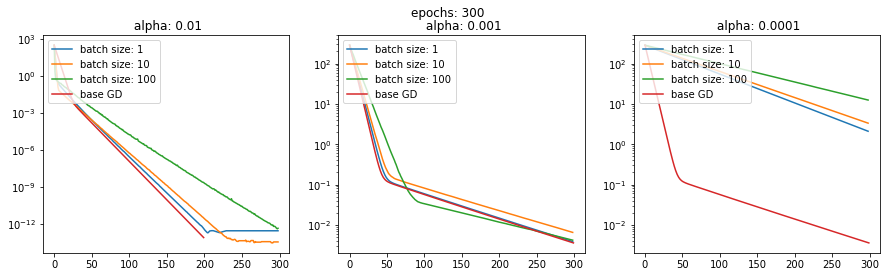

In [40]:
### function 1
n = 3
N = 100

w = np.ones((1,n))
x = np.random.rand(n, N)

y = w @ x

def f(w, x, y):
    return np.sum( ( (w @ x) - y) **2)  
    
                
def grad_f(w, x, y):
    return 2 * (((w @ x) - y) @ x.T) 

n_epoch = 300


sgd_plot(f, grad_f, x, y, n_epoch)


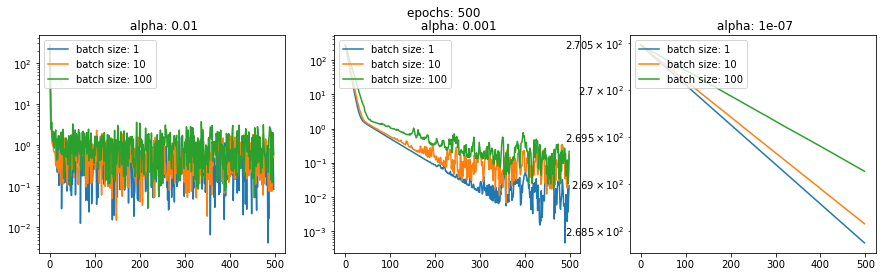

In [20]:
# y tilde

y_tilde = w @ x + np.random.normal(0, 0.1, (1,N))
z = w @ (x**2)

sgd_plot(f, grad_f, x, y_tilde, n_epoch)

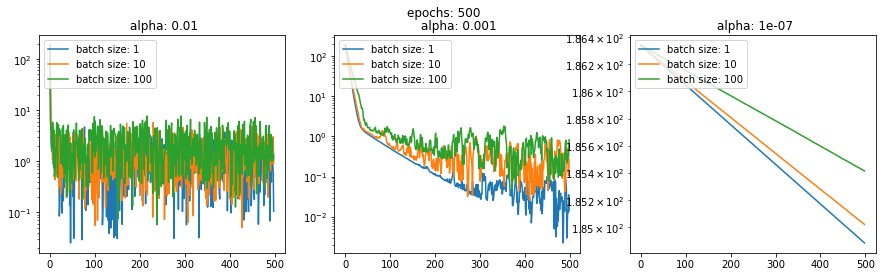

In [22]:
# z function

z = w @ (x**2)

sgd_plot(f, grad_f, x, z, n_epoch)

***
From the graphs plotted above we can understand that in the case without noise the convergence process is quite smooth, instead in the case of noise (in the two last examples), even the gradient is subject to high oscillation. **As we can observe, small batch size gradients are less likely to get stuck in basins of the function**
Again, using a too big $\alpha$ can cause divergence while using a small $\alpha$ the convergence process is slower.

**In the beginning, all the gradients point in the same direction, while (in the case of noise) they vary a lot and in the case of zeta function, we're trying to calculate the least square function on a linear function while z has its x terms elevated to the power of 2. Another important aspect is that in the functions in which was added noise (y_tilde and z) each row of the dataset is now affected by noise and therefore the solution of those terms is altered by a different amount **

Obviously, SGD is a lot lighter than base GD because (even by definition) we know that GD calculates the whole gradient of the dataset while SGD performs it just on a subset of them (and therefore it is faster and it should end before the other one when we choose a small batch size, even though that we'll have a more raw convergence)


***